## Feature extraction 

In [1]:
from jl_song_data import SongData 
import pandas as pd

In [2]:
data = SongData('../data/chords_clean_1_2_3_4_5_6.csv')

In [3]:
df = data.df

In [4]:
from jl_feature_extractor import FeatureExtractor    

feature_extractor = FeatureExtractor()

## Customise plotting 

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('dark_background')

## Chord Objects column 

We have a input string representing an array of chords. We must convert it to a list of objects of type ExtendedChord (see jl_extended_chord.py). It is an expensive process, so we will store these data temporarly in a column to improve performance

In [6]:
df['chord objects'] = df['chords'].apply(feature_extractor.extract_chord_object_list_removing_non_valid)

In [7]:
first_chord_of_first_song = df['chord objects'].iloc[0][0]

In [8]:
type(first_chord_of_first_song)

jl_extended_chord.ExtendedChord

In [9]:
print(first_chord_of_first_song)

D


##  Extract artist 

In [10]:
df['artist'] = df['url'].apply(feature_extractor.extract_pretty_artist)

In [11]:
df.sample(5)

,url,name,decade,genre,chords,uuid,chord objects,artist
10293,https://tabs.ultimate-guitar.com/tab/red-hot-c...,Dani California,2000s,Rock,"['Am', 'G', 'Dm', 'Am', 'Am', 'G', 'Dm', 'Am',...",d41f3498-f177-4469-bf0a-e587602b3bc1,"[Am, G, Dm, Am, Am, G, Dm, Am, Am, G, Dm, Am, ...",Red Hot Chili Peppers
8031,https://tabs.ultimate-guitar.com/tab/madness/h...,House Of Fun,1980s,Reggae%%Reggae,"['D', 'Am', 'B', 'A#', 'D', 'Am', 'D', 'Am', '...",0aee4697-ed31-4efc-a95b-1d14fdebe89c,"[D, Am, B, A#, D, Am, D, Am, F7, E7, D, Am, D,...",Madness
7170,https://tabs.ultimate-guitar.com/tab/kendrick-...,Money Trees,2010s,Hip Hop,"['G', 'F', 'G#', 'F#', 'G', 'F', 'G#', 'F#', '...",5dde33f1-bd03-4527-aa04-a8d0559aec3a,"[G, F, G#, F#, G, F, G#, F#, G, F, G#, F#, G, ...",Kendrick Lamar
13589,https://tabs.ultimate-guitar.com/tab/vince_gil...,Let There Be Peace On Earth,1990s,Pop%%Country,"['C', 'Am', 'F', 'G', 'C', 'Am', 'F', 'G', 'C'...",bca33156-5791-4c3c-9b4c-d7b146026a3a,"[C, Am, F, G, C, Am, F, G, C, Am, Dm, G, C, Am...",Vince Gill
2231,https://tabs.ultimate-guitar.com/tab/cat-steve...,Here Comes My Baby,1960s,Folk%%Pop,"['G', 'G', 'D', 'D', 'C', 'C', 'D4', 'Dsus2', ...",ace5d7cb-f989-49a5-b3c4-958267048846,"[G, G, D, D, C, C, D4, Dsus2, G, D, C, D, G, D...",Cat Stevens


## Extract decade as numeric 

In [12]:
df['decade'].unique()

array(['1980s', '2000s', '2010s', '1990s', '1960s', '1970s', '1950s'],
      dtype=object)

In [13]:
df['decade'] = df['decade'].apply(feature_extractor.extract_numeric_decade)

In [14]:
df['decade'].unique()

array([1980, 2000, 2010, 1990, 1960, 1970, 1950])

## Remove duplicate genres

In [15]:
def remove_duplicate_genre_inside_cell(value):
    unique_genres = list(set(value.split('%%')))
    unique_genres.sort(key=str.lower)
    return '%%'.join(unique_genres)
    

df['genre'] = df['genre'].apply(remove_duplicate_genre_inside_cell)

In [16]:
import jl_io as io

genres = io.from_file('../data/genres')

In [17]:
genre_names = [genre['name'] for genre in genres]
genre_names

['Rock',
 'Folk',
 'Pop',
 'Country',
 'Electronic',
 'Rhythm And Blues',
 'Metal',
 'Contemporary R&b',
 'Religious Music',
 'Hip Hop',
 'Reggae',
 'Jazz',
 'Blues',
 'World Music',
 'Disco',
 'Comedy',
 'New Age',
 'Classical',
 'Experimental',
 'Darkwave',
 'Soundtrack']

In [18]:
genre_df = pd.DataFrame(genre_names, columns=['genre'])

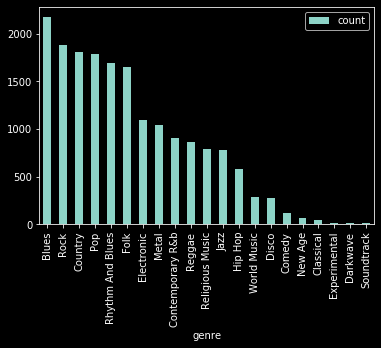

In [19]:
genre_df['count'] = genre_df['genre'].apply( \
    lambda genre: len(df[df['genre'].str.contains(genre)]))

genre_df.sort_values(by='count', ascending=False).plot.bar(x='genre', y=f'count')

In genre statistics, we will remove genres with few data (from comedy to soundtrack)

In [20]:
limit_count = genre_df[genre_df['genre']=='Disco']['count'].values[0]
limit_count

274

In [21]:
genre_df = genre_df[genre_df['count'] >= limit_count]

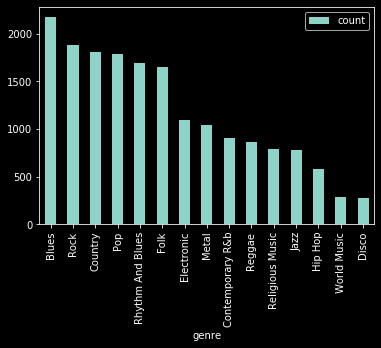

In [22]:
genre_df.sort_values(by='count', ascending=False).plot.bar(x='genre', y=f'count')

## Harmonics features 

We are going to extract all the harmonic features, i.e. related to chords. 

### Cardinality (number of chords) 

In [23]:
df['cardinality'] = df['chord objects'].apply(feature_extractor.extract_cardinality)

In [24]:
df.sample(5)

,url,name,decade,genre,chords,uuid,chord objects,artist,cardinality
10996,https://tabs.ultimate-guitar.com/tab/shawn_men...,Life Of The Party (ver 3),2010,Pop%%Rhythm And Blues,"['Em', 'G', 'C', 'D', 'Em', 'C', 'G', 'C', 'Em...",cf2df935-ee6b-49bc-8a2f-d0ea71f1c825,"[Em, G, C, D, Em, C, G, C, Em, G, C, D, Em, C,...",Shawn Mendes,89
12301,https://tabs.ultimate-guitar.com/tab/the_everl...,Bird Dog,1950,Country,"['B', 'E', 'A', 'F#', 'B', 'E', 'B', 'F#', 'E'...",0cd33322-65ba-4fde-b145-7220ac04e673,"[B, E, A, F#, B, E, B, F#, E, B, E, A, F#, E, ...",The Everly Brothers,23
6900,https://tabs.ultimate-guitar.com/tab/justin-bi...,Mistletoe,2010,Pop,"['A', 'E', 'F#m', 'D', 'A', 'E', 'F#m', 'D', '...",5c457da9-6458-4543-a4ba-a1494375ae73,"[A, E, F#m, D, A, E, F#m, D, A, E, F#m, D, A, ...",Justin Bieber,54
10371,https://tabs.ultimate-guitar.com/tab/rend-coll...,You Bled (ver 2),2010,Religious Music,"['Am', 'F', 'C', 'G', 'Am', 'F', 'C', 'Am', 'F...",00dae427-2841-45a0-9dc2-678b70c6b8ac,"[Am, F, C, G, Am, F, C, Am, F, C, G, Am, F, C,...",Rend Collective,68
7822,https://tabs.ultimate-guitar.com/tab/louis-arm...,Dream A Little Dream Of Me,1960,Jazz,"['F', 'Fm', 'C/E', 'Ebdim7', 'C#m7', 'Dm7', 'F...",58e83d95-197f-4bd2-abf8-44630129b793,"[F, Fm, C/E, Ebdim7, C#m7, Dm7, F#9, G9, C, C/...",Louis Armstrong,109


In [25]:
df['cardinality'].describe()

count    14114.000000
mean        85.521468
std         68.705570
min          0.000000
25%         51.000000
50%         77.000000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

In [26]:
df[df['cardinality'] == 0]

,url,name,decade,genre,chords,uuid,chord objects,artist,cardinality
19,https://tabs.ultimate-guitar.com/tab/120815,Balladen Om Herr Fredrik Åkare Och Den Söta Fr...,1960,Jazz,[],752b3d65-297f-4777-acc4-e9d92e243a72,[],Unknown,0
160,https://tabs.ultimate-guitar.com/tab/883/cumul...,Cumuli,1990,Electronic,[],523bfc79-9f5d-4747-8db3-366bd5d32152,[],883,0
163,https://tabs.ultimate-guitar.com/tab/883/rotta...,Rotta X Casa Di Dio,1990,Electronic,[],8c8a69f6-7027-4816-a91d-d219d87582ca,[],883,0
217,https://tabs.ultimate-guitar.com/tab/abba/danc...,Dancing Queen (ver 3),1970,Pop,[],044a35a5-3943-49a5-bb6a-e0f5e19776cf,[],Abba,0
218,https://tabs.ultimate-guitar.com/tab/abba/danc...,Dancing Queen (ver 4),1970,Pop,[],bb8e839f-0d3f-40b6-9ee3-5fd4aa0301e1,[],Abba,0
...,...,...,...,...,...,...,...,...,...
12490,https://tabs.ultimate-guitar.com/tab/the_lonel...,Like A Boss,2000,Hip Hop,[],1a6d53ae-aeea-4bdd-a1e2-3100bbf3c88e,[],The Lonely Island,0
13107,https://tabs.ultimate-guitar.com/tab/tony_benn...,A Child Is Born,1970,Jazz,[],1dc741fc-51a9-40ef-a328-48eb8a467b62,[],Tony Bennett,0
13369,https://tabs.ultimate-guitar.com/tab/tyler_the...,Answer,2010,Hip Hop,[],8474fdc1-00c5-457a-9178-41b1bb48a21f,[],Tyler The Creator,0
13802,https://tabs.ultimate-guitar.com/tab/wham/free...,Freedom,1980,Pop%%Rhythm And Blues,[],f0a72548-c85e-4848-bf60-af2e62993f5d,[],Wham,0


Some songs are been uploaded by user/ultimate guitar without including the special format for the chords, for example, in https://tabs.ultimate-guitar.com/tab/883/rotta-x-casa-di-dio-chords-89055. Let's remove them

In [27]:
df = df[df['cardinality'] != 0]

In [28]:
df['cardinality'].describe()

count    14043.000000
mean        85.953856
std         68.608710
min          1.000000
25%         51.000000
50%         77.000000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

We will also remove songs with only one chord (eg. https://tabs.ultimate-guitar.com/tab/mad-caddies/souls-for-sale-chords-837415)

In [29]:
df = df[df['cardinality'] != 1]

In [30]:
df['cardinality'].describe()

count    14038.000000
mean        85.984115
std         68.602188
min          2.000000
25%         51.000000
50%         77.500000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

In [31]:
df['cardinality'].mode()

0    68
1    72
dtype: int64

Total number of chords

In [32]:
df['cardinality'].sum()

1207045

In [33]:
import matplotlib.pyplot as plt

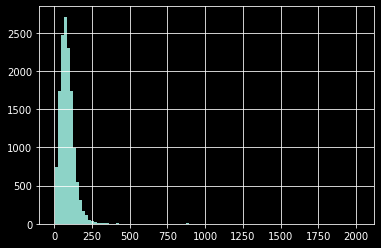

In [34]:
df['cardinality'].hist(bins=100)

#### By genre 

In [35]:
def plot_mean_by_genre(column_name):
    genre_df[f'avg {column_name}'] = genre_df['genre'].apply( \
        lambda genre: df[df['genre'].str.contains(genre)][column_name].mean())
    
    genre_df.sort_values(by=f'avg {column_name}', ascending=False).plot.bar(x='genre', y=f'avg {column_name}')
    

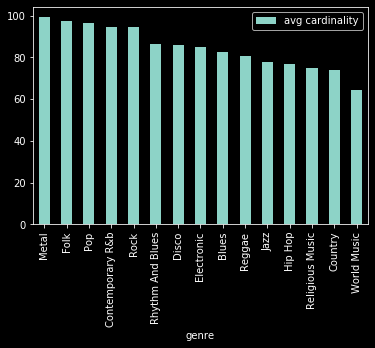

In [36]:
plot_mean_by_genre('cardinality')

#### By decade 

In [37]:
def plot_mean_by_decade(feature):
    df.groupby('decade')[feature].mean().plot.bar()

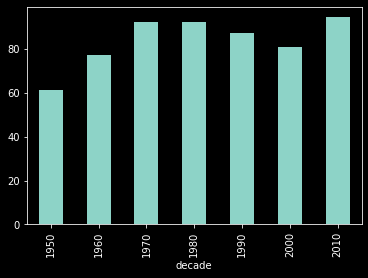

In [38]:
plot_mean_by_decade('cardinality')

### Unique cardinality (number of different chords) 

In [39]:
df['unique cardinality'] = df['chord objects'].apply(feature_extractor.extract_unique_cardinality)

In [40]:
df['unique cardinality'].describe()

count    14038.000000
mean         7.174669
std          4.614989
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         72.000000
Name: unique cardinality, dtype: float64

Mode is 4...modern music is not very rich...

In [41]:
df['unique cardinality'].mode()

0    4
dtype: int64

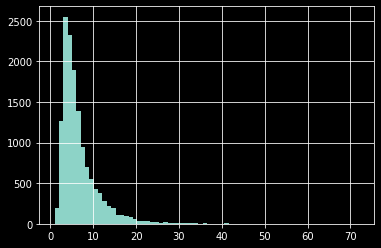

In [42]:
df['unique cardinality'].hist(bins=70)

#### By genre 

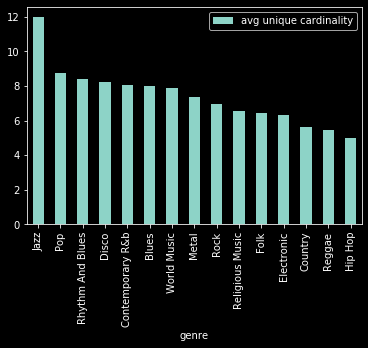

In [43]:
plot_mean_by_genre('unique cardinality')

#### By decade 

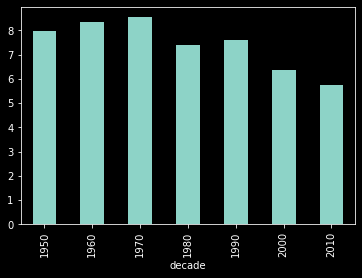

In [44]:
plot_mean_by_decade('unique cardinality')

### Mode

Major :)

Minor :(

Neutral :|

In [45]:
from jl_extended_chord import ChordMode

In [46]:
df['major cardinality'] =\
df['chord objects'].apply(\
    lambda chords: feature_extractor.extract_mode_cardinality(chords, ChordMode.Major))

In [47]:
df['minor cardinality'] =\
df['chord objects'].apply(\
    lambda chords: feature_extractor.extract_mode_cardinality(chords, ChordMode.Minor))

In [48]:
df['neutral cardinality'] =\
df['chord objects'].apply(\
    lambda chords: feature_extractor.extract_mode_cardinality(chords, ChordMode.Neutral))

In [49]:
def show_info(series):
    print(series.describe())
    print(f"Mode:{series.mode()}")
    series.hist(bins=100)

count    14038.000000
mean        60.772617
std         51.957886
min          0.000000
25%         34.000000
50%         53.000000
75%         78.000000
max       1871.000000
Name: major cardinality, dtype: float64
Mode:0    40
dtype: int64


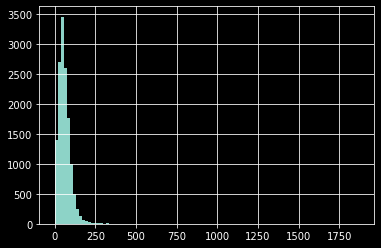

In [50]:
show_info(df['major cardinality'])

count    14038.000000
mean        22.585625
std         27.372958
min          0.000000
25%          5.000000
50%         17.000000
75%         32.000000
max       1022.000000
Name: minor cardinality, dtype: float64
Mode:0    0
dtype: int64


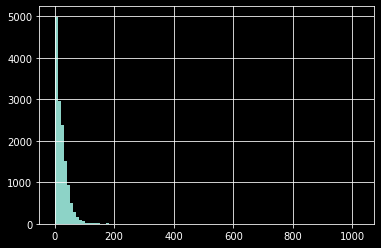

In [51]:
show_info(df['minor cardinality'])

In average, there are three times more major chords than minor chords. It is the expected discovery

count    14038.000000
mean         2.625873
std         12.158898
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        318.000000
Name: neutral cardinality, dtype: float64
Mode:0    0
dtype: int64


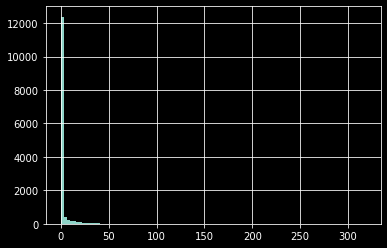

In [52]:
show_info(df['neutral cardinality'])

In [53]:
df[df['neutral cardinality'] == 318]

,url,name,decade,genre,chords,uuid,chord objects,artist,cardinality,unique cardinality,major cardinality,minor cardinality,neutral cardinality
10816,https://tabs.ultimate-guitar.com/tab/scorpions...,Rock You Like A Hurricane (ver 2),1980,Metal,"['E5', 'G5', 'A5', 'C5', 'D5', 'C5', 'E5', 'C5...",564b6999-b037-4758-9b15-3adc9b88357a,"[E5, G5, A5, C5, D5, C5, E5, C5, E5, D5, C5, E...",Scorpions,318,5,0,0,318


Scorpions like neutral chords... :)

### Sadness  

Let's use previous features to calculate a new feature: `sadness`

In [54]:
df['sadness'] = (df['minor cardinality'] / df['cardinality'])


In [55]:
df['sadness'].describe()

count    14038.000000
mean         0.257394
std          0.202100
min          0.000000
25%          0.096774
50%          0.243746
75%          0.375000
max          1.000000
Name: sadness, dtype: float64

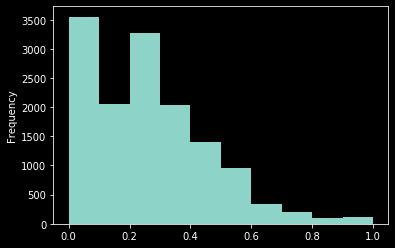

In [56]:
df['sadness'].plot.hist()

In [57]:
df[df['genre'].str.contains('Metal')]['sadness'].mean()

0.2787988934417069

In [58]:
df[df['genre'].str.contains('Jazz')]['sadness'].mean()

0.3178758089746847

In [59]:
df[df['genre'].str.contains('Pop')]['sadness'].mean()

0.2742307112838404

In [60]:
df[df['genre'].str.contains('Rock')]['sadness'].mean()

0.21933666795532078

#### By genre 

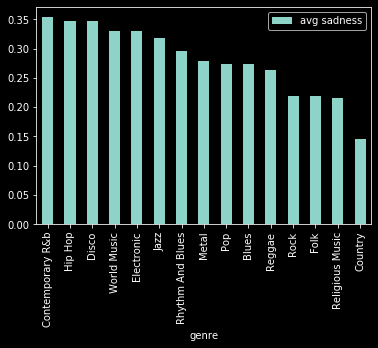

In [61]:
plot_mean_by_genre('sadness')

####  By decade

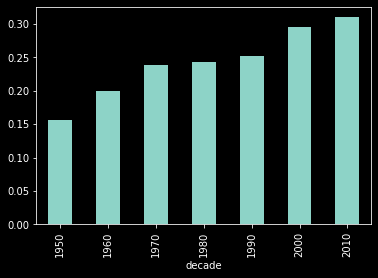

In [62]:
plot_mean_by_decade('sadness')

Los modernos somos unos tristes

### Harmonic mean 

In [63]:
df['harmonic mean X'] = df['chord objects'].apply(feature_extractor.extract_harmonic_mean_x)

In [64]:
df['harmonic mean Y'] = df['chord objects'].apply(feature_extractor.extract_harmonic_mean_y)

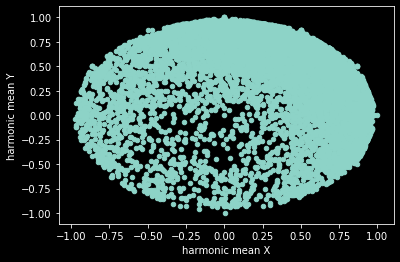

In [65]:
df.plot.scatter(x='harmonic mean X', y='harmonic mean Y')

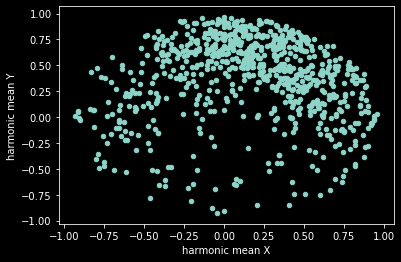

In [66]:
df[df['genre'].str.contains('Jazz')].plot.scatter(x='harmonic mean X', y='harmonic mean Y')

In [67]:
df['harmonic mean position'] = df['chord objects'].apply(feature_extractor.extract_harmonic_mean_position)

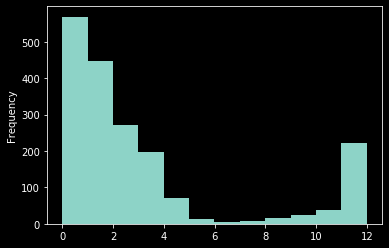

In [68]:
df[df['genre'].str.contains('Rock')]['harmonic mean position'].plot.hist(bins=12)

### Widths 

In [69]:
 df['subdominant width'] = df['chord objects'].apply(feature_extractor.extract_subdominant_width)

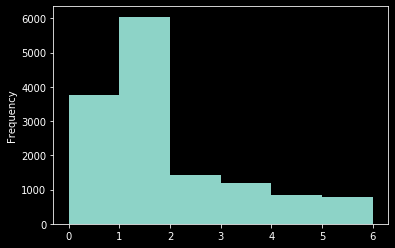

In [70]:
 df['subdominant width'].plot.hist(bins=6)

In [71]:
df['dominant width'] = df['chord objects'].apply(feature_extractor.extract_dominant_width)

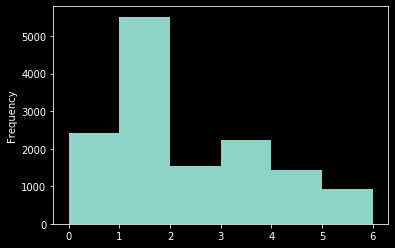

In [72]:
df['dominant width'].plot.hist(bins=6)

In [73]:
df['harmonic width'] =  df['subdominant width'] + df['dominant width']

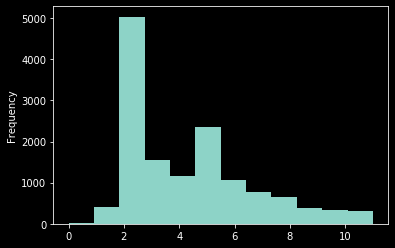

In [74]:
df['harmonic width'].plot.hist(bins=12)

#### By genre 

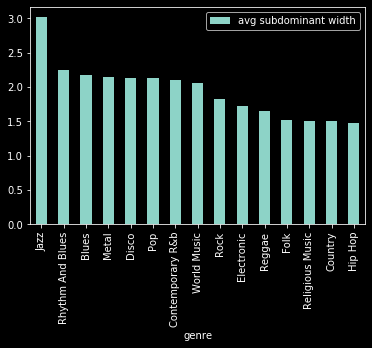

In [75]:
plot_mean_by_genre('subdominant width')

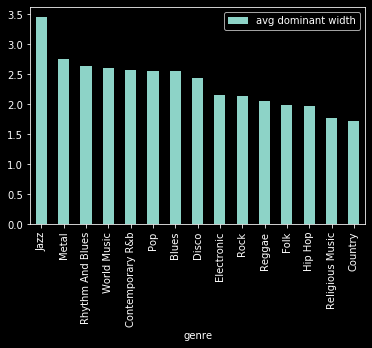

In [76]:
plot_mean_by_genre('dominant width')

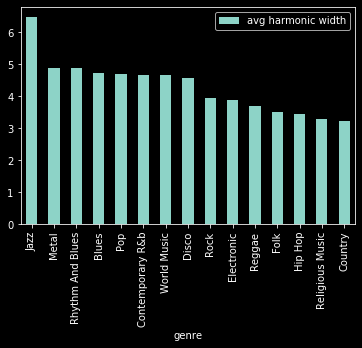

In [77]:
plot_mean_by_genre('harmonic width')

#### By decade 

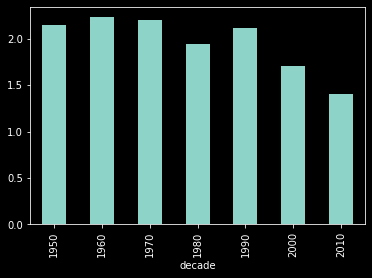

In [78]:
plot_mean_by_decade('subdominant width')

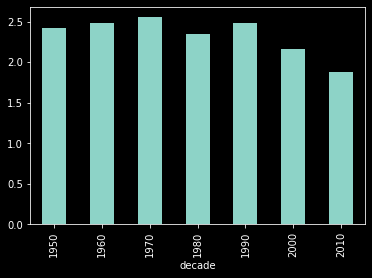

In [79]:
plot_mean_by_decade('dominant width')

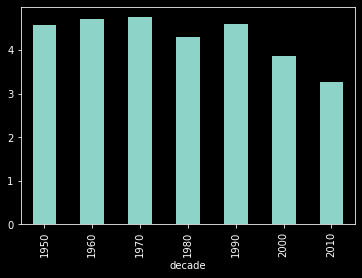

In [80]:
plot_mean_by_decade('harmonic width')

### Complexity 

In [81]:
 df['complexity'] = df['chord objects'].apply(feature_extractor.extract_complexity)

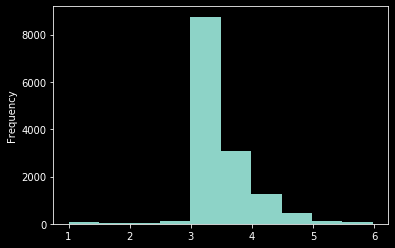

In [82]:
df['complexity'].plot.hist()

#### By genre 

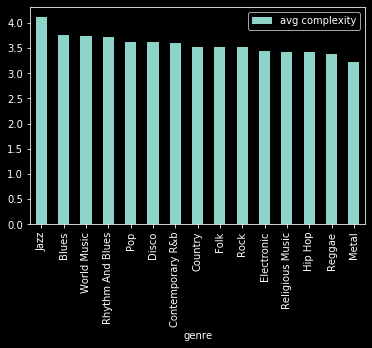

In [83]:
plot_mean_by_genre('complexity')

#### By decade 

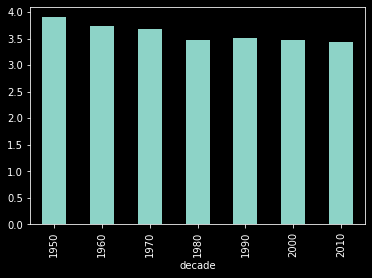

In [84]:
plot_mean_by_decade('complexity')

In [85]:
df[df['genre'].str.contains('Jazz')].groupby('decade')['url'].count()

decade
1950    204
1960    192
1970     70
1980     38
1990     74
2000    145
2010     52
Name: url, dtype: int64

### Slash chord distrbution 

In [86]:
df['slash chords'] = df['chord objects'].apply(feature_extractor.extract_relative_on_list)

In [87]:
set(df['slash chords'].sum())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

All the notes are included as slash chord...!

In [88]:
list(range(0,12))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [89]:
slash_df = pd.DataFrame(list(range(0,12)), columns=['slash in semitones'])

In [90]:
slash_df

,slash in semitones
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [91]:
slash_df['count'] = slash_df['slash in semitones'].apply( \
    lambda slash: len(df[df['slash chords'].apply( \
            lambda slashes: slash in slashes)] ))

In [92]:
slash_df

,slash in semitones,count
0,0,17
1,1,36
2,2,498
3,3,287
4,4,1713
5,5,376
6,6,39
7,7,1027
8,8,96
9,9,263


In [93]:
from music21.interval import Interval
from music21.note import Note

In [94]:
slash_df['interval'] = slash_df['slash in semitones'].apply(lambda st: Interval(noteStart=Note(0),noteEnd=Note(st)).name)

In [95]:
slash_df

,slash in semitones,count,interval
0,0,17,P1
1,1,36,A1
2,2,498,M2
3,3,287,m3
4,4,1713,M3
5,5,376,P4
6,6,39,A4
7,7,1027,P5
8,8,96,A5
9,9,263,M6


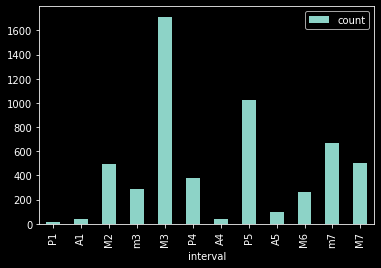

In [96]:
slash_df.plot.bar(x='interval', y='count')

We won't include slash chord information in the RNN in order to simplify the problem. The consequnece is that the composed music will be less rich

In [97]:
songs_without_slash_chords = len(df[df['slash chords'].apply(lambda slashes: len(slashes) == 0)])
songs_without_slash_chords

11019

In [98]:
songs_with_slash_chords = len(df[df['slash chords'].apply(lambda slashes: len(slashes) > 0)])
songs_with_slash_chords

3019

## Normalising the chords

A song can be transported from a tonality to other. The relations between its chords are the same, but it only have a higher or lower pitch level. For example:

In [99]:
from jl_music21_utils import show_sequence
from jl_chord_parser import ChordParser

parse = ChordParser().parse

For example, from this original sequence

['E', 'B', 'E']


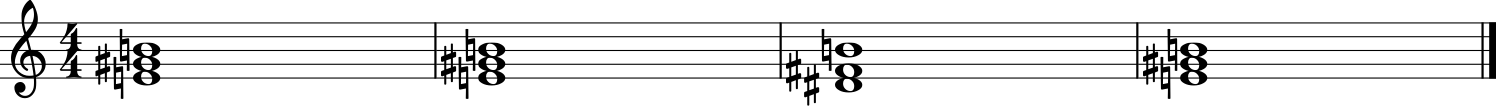

In [100]:
show_sequence([parse(chord) for chord in ['E', 'B', 'E']])

We can create a transported version

['Eb', 'Bb', 'Eb']


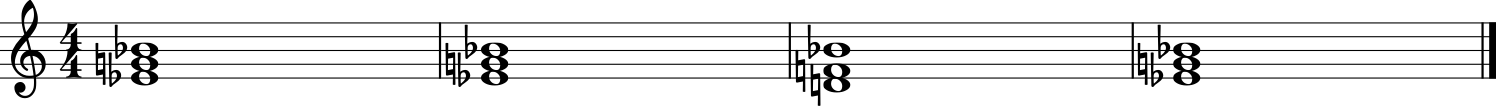

In [101]:
show_sequence([parse(chord) for chord in ['Eb', 'Bb', 'Eb']])

The model could have better performance if we transport all the songs to have almost the same harmonic mean. So...lets do it

In [102]:
df['chord objects']

0        [D, Dmaj7, D, Dmaj7, D, Dmaj7, D, Dmaj7, D, Dm...
1        [G, G, C, D, G, G, G, G, G, Em, G, Em, C, D, G...
2        [F, G, Am, G, C, F, F, G, Am, G, F, G, C, G, F...
3        [Asus4, G, Bm7/A, Bm, D/F#, A, Asus2, A/C#, D,...
4        [G, D, Em, C, G, D, Em, C, G, D, D, C, G, D, C...
                               ...                        
14109    [Bm, A, Bm, A, Bm, A, Em, G, D, A, Bm, A, Em, ...
14110    [Gm, Bb, F, Gm, Gm, Bb, F, Gm, Gm, Bb, F, Gm, ...
14111    [A, E, Bm, D, A, E, Bm, D, A, A, E, Bm, D, A, ...
14112    [A, E, Bm, A, E, Bm, A, E, Bm, A, E, Bm, A, E,...
14113    [G, A, E, B, E, B, E, B, E, A, E, B, E, A, E, ...
Name: chord objects, Length: 14038, dtype: object

In [103]:
df['harmonic mean in scale'] = df['harmonic mean position'].apply(feature_extractor.extract_harmonic_mean_in_scale)


In [104]:
df[['harmonic mean in scale', 'harmonic mean position']].sample(5)

,harmonic mean in scale,harmonic mean position
10958,10,9.736289
7554,6,5.904803
4628,0,11.834687
5590,7,0.854845
5926,9,3.463666


In [109]:
df['normalised chords'] = df.apply(lambda row: feature_extractor.extract_transposed_chords_names\
                (row['chord objects'], -row['harmonic mean in scale']), axis=1)

In [112]:
df[['name','chords', 'normalised chords', 'harmonic mean in scale']].sample(5)

,name,chords,normalised chords,harmonic mean in scale
7173,Back Where I Come From,"['D', 'A', 'F#m', 'G', 'D', 'A', 'F#m', 'D', '...","[C, G, Em, F, C, G, Em, C, C, G, Em, F, C, G, ...",2
645,Oh Our Lord,"['C', 'G', 'C', 'G', 'C', 'G', 'D', 'G', 'C', ...","[F, C, F, C, F, C, G, C, F, Am, G, C, F, Am, G...",7
2018,Well All Right (ver 2),"['F#', 'B', 'C#', 'D', 'C', 'D', 'D', 'A', 'D'...","[E, A, B, C, Bb, C, C, G, C, C, Bb, C, G, C, B...",2
5546,Love Goes On,"['A', 'C#m', 'E', 'A', 'C#m', 'E', 'A', 'C#m',...","[F, Am, C, F, Am, C, F, Am, C, F, Am, C, F, Am...",4
11864,Sowing The Seeds Of Love,"['Gm7', 'F', 'EbMaj7', 'Am/D', 'EbMaj7', 'Am/D...","[Dm7, C, BbM7, Em, BbM7, Em, BbM7, Em, Dm7, C,...",5


#### Checking normalisation

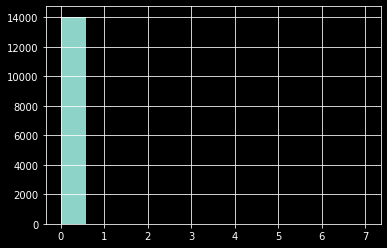

In [115]:
parse = ChordParser().parse

normalised_chord_objects = df['normalised chords'].apply(lambda chords: [parse(chord) for chord in chords])
harmonic_mean_position = normalised_chord_objects.apply(feature_extractor.extract_harmonic_mean_position)
harmonic_mean_in_scale = harmonic_mean_position.apply(feature_extractor.extract_harmonic_mean_in_scale)
harmonic_mean_in_scale.hist(bins=12)

## Saving the data

In [118]:
data.df = df
data.save('../data/all_features.csv')